# Análise de dados de encomendas depositadas no equipamento "Boca de Lobo"

Esta análise visa demonstrar as principais informações referentes às encomendas depositadas no equipamento "Boca de Lobo", instalado na estação do MetrôRio Estácio de Sá.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import json

Url informada em arquivo json. Não disponibilizarei publicamente

In [19]:
with open('url.json') as f:
    data = json.load(f)

O dataset é disponibilizado no formato xlsx pela aplicação.
A aplicação utiliza um banco SQLite e disponibiliza um arquivo xlsx com todos os registros desde a instalação da máquina.
A obtenção do arquivo xlsx é feito atráves do serviço ngrok

In [20]:
url_boca_de_lobo = data['url']

In [21]:
%time
encomendas_depositadas = pd.read_excel(url_boca_de_lobo)

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
encomendas_depositadas

,Hash,Entregador,Entregadora,Cidade,UF,Data,Gaveta,QR,Código da encomenda
0,09668303d2a0a4cd17d753eed1a69fdb0ee09053,VVVGG,CN22,Rio de Janeiro,RJ,2020-09-22T12:30:33.418Z,1,NaN,VGYY
1,09668303d2a0a4cd17d753eed1a69fdb0ee09053,VVVGG,CN22,Rio de Janeiro,RJ,2020-09-22T12:30:33.418Z,1,NaN,TGGG
2,021a346c02719de2fb04fc422002e353eb30f1f2,TGF,CN22,Rio de Janeiro,RJ,2020-09-22T12:31:37.749Z,2,NaN,YYU
3,1347b82264fb6d841bfaca3b16ed75fd00ba495b,ALEX,B2W,Rio de Janeiro,RJ,2020-09-22T12:36:08.053Z,1,NaN,GF445CFGBR
4,1347b82264fb6d841bfaca3b16ed75fd00ba495b,ALEX,B2W,Rio de Janeiro,RJ,2020-09-22T12:36:08.053Z,1,NaN,TVGG65BR
...,...,...,...,...,...,...,...,...,...
122901,152096c5d90bda9d16db9477a696c8277a25cebe,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,2023-04-28T17:49:15.612Z,0,AM050659188LO,NaN
122902,152096c5d90bda9d16db9477a696c8277a25cebe,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,2023-04-28T17:49:15.612Z,0,PAC0238998991,NaN
122903,152096c5d90bda9d16db9477a696c8277a25cebe,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,2023-04-28T17:49:15.612Z,0,4972751585429,NaN
122904,152096c5d90bda9d16db9477a696c8277a25cebe,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,2023-04-28T17:49:15.612Z,0,AM050592603LO,NaN


In [23]:
encomendas = encomendas_depositadas.filter(items=['Entregador', 'Entregadora', 'Cidade', 'UF', 'Data', 'Gaveta', 'Código da encomenda'])

In [24]:
encomendas = encomendas.rename(columns={'Código da encomenda':'Codigo'})

A data do sistema é disponibilizada com o fuso UTC 0. Além disso, é necessário converter o formato de data disponibilizado.

In [25]:
data_formatada = []
erro_hora = timedelta(hours=3) #hora do sistema está considerando UTC 0. Conversão para UTC-3

for i in range(len(encomendas['Data'])):
  data_formatada.append((datetime(int(encomendas.Data[i][:4]), int(encomendas.Data[i][5:7]), int(encomendas.Data[i][8:10]), int(encomendas['Data'][i][11:13]), int(encomendas['Data'][i][14:16])) - erro_hora))


In [26]:
encomendas['data'] = data_formatada

In [44]:
encomendas.drop(columns={'Data'}, inplace=True)

In [45]:
encomenda_ano = encomendas.data.dt.year.value_counts().sort_index()
encomenda_ano.index

Int64Index([2020, 2021, 2022, 2023], dtype='int64')

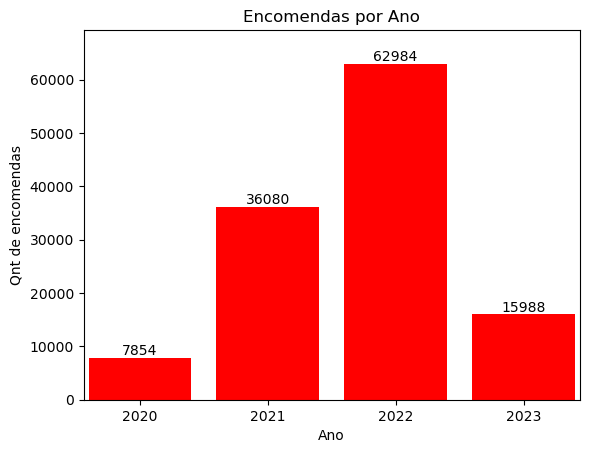

In [46]:
x = encomenda_ano.index.astype(str)
height = encomenda_ano.values


bar_graph = plt.bar(x, height=height, color='red')
plt.xlabel("Ano")
plt.ylabel("Qnt de encomendas")
plt.gca().set_title('Encomendas por Ano')
plt.bar_label(bar_graph, fontsize=10)
plt.margins(x=0.01, y=0.1)
plt.show()

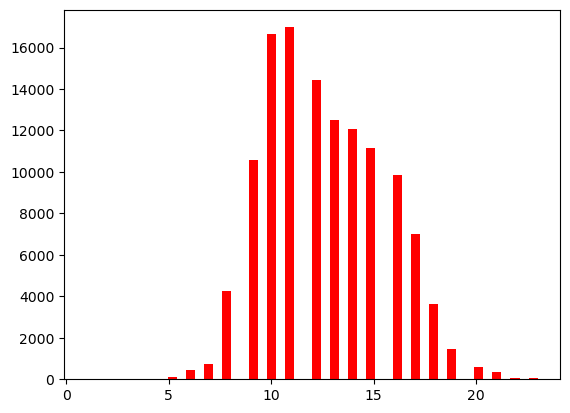

In [47]:
plt.hist(encomendas.data.dt.hour, bins= 50, color='red')
plt.show()

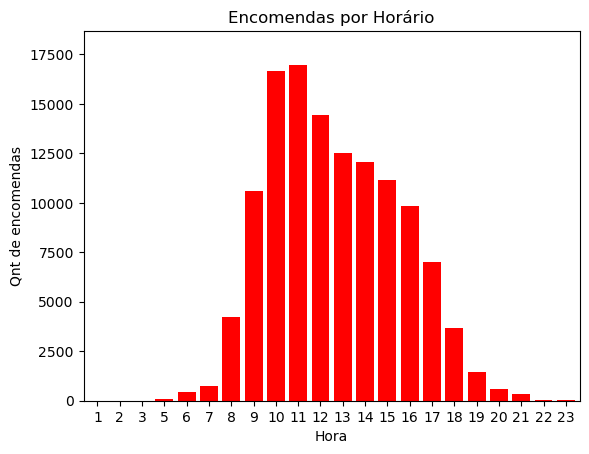

In [48]:
encomenda_hora = encomendas.data.dt.hour.value_counts().sort_index()

x_hora = encomenda_hora.index.astype(str)
height_hora = encomenda_hora.values


bar_graph_hora = plt.bar(x_hora, height=height_hora, color='red')
plt.xlabel("Hora")
plt.ylabel("Qnt de encomendas")
plt.gca().set_title('Encomendas por Horário')
plt.margins(x=0.01, y=0.1)
plt.show()

In [49]:
entregadoras = encomendas.Entregadora.value_counts().to_frame()
entregadoras.head(20)

,Entregadora
B2W,12930
Sequoia,12078
Total,9990
Loggi,8926
PARCEIRO,6056
TOTAL EXPRESS,5538
Jadlog,4730
Fast Serv,4344
DHL,3780
Flash Courrier,3302


In [50]:
#entregadoras.head(20).to_csv('entregadoras_rev1.csv', sep=';')

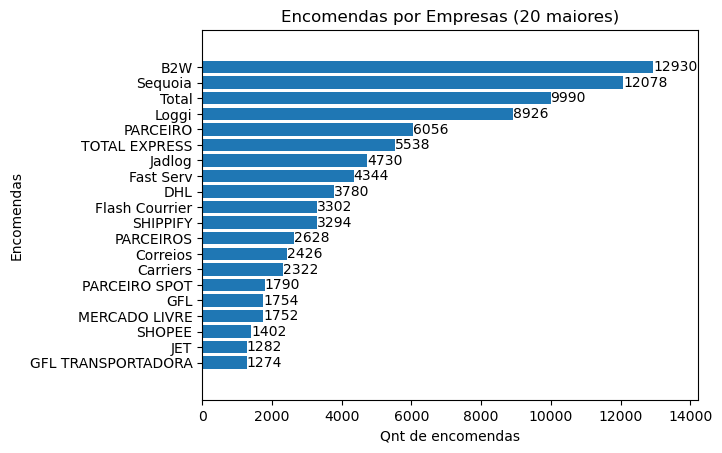

In [51]:
x_empresas = entregadoras.head(20).index
width_empresas = entregadoras.head(20)['Entregadora']

bar_empresas = plt.barh(x_empresas, width=width_empresas)
plt.gca().invert_yaxis()
plt.gca().set_title('Encomendas por Empresas (20 maiores)')
plt.xlabel("Qnt de encomendas")
plt.ylabel("Encomendas")
plt.bar_label(bar_empresas, fontsize=10)
plt.margins(x=0.1, y=0.1)
plt.show()

In [52]:
encomendas_depositadas.count()

Hash                   122906
Entregador             122896
Entregadora            119696
Cidade                 122906
UF                     122906
Data                   122906
Gaveta                 122906
QR                      98892
Código da encomenda     24006
dtype: int64

In [53]:
percent_qr = round(encomendas_depositadas.count().QR /  encomendas_depositadas.count().Hash,3) * 100
percent_noqr = round(100 - percent_qr, 3)


qr_control = pd.DataFrame.from_dict({"QR":percent_qr, "Teclado":percent_noqr}, orient='index')
qr_control

,0
QR,80.5
Teclado,19.5


In [54]:
qr_control.values.ravel()

array([80.5, 19.5])

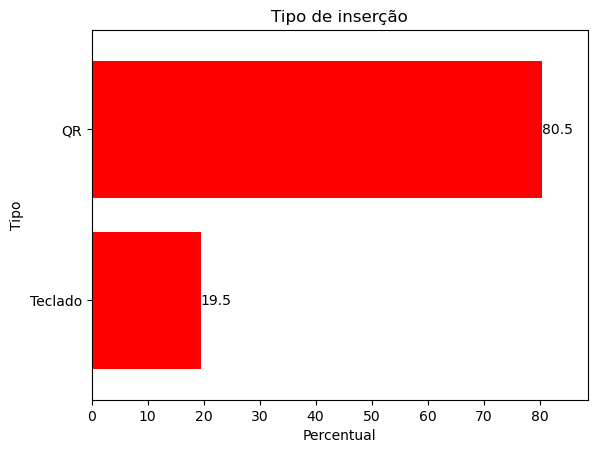

In [55]:
x_qr = qr_control.index
values_qr = qr_control.values.ravel()

bar_qr = plt.barh(x_qr, width=values_qr, color='red')
plt.gca().invert_yaxis()
plt.gca().set_title('Tipo de inserção')
plt.xlabel("Percentual")
plt.ylabel("Tipo")
plt.bar_label(bar_qr, fontsize=10)
plt.margins(x=0.1, y=0.1)
plt.show()

In [39]:
dia_atual = datetime.now().date()
dia_atual

datetime.date(2023, 4, 28)

In [56]:
encomendas_atual = encomendas[encomendas.data.dt.date == dia_atual]
encomendas_atual

,Entregador,Entregadora,Cidade,UF,Gaveta,Codigo,data
61405,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00
61406,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00
61407,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00
61408,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00
61409,ANDRESSA,GFL,Rio de Janeiro,RJ,0,02205178,2023-04-28 09:51:00
...,...,...,...,...,...,...,...
122901,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00
122902,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00
122903,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00
122904,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00


In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
encomendas_atual['hora'] = encomendas_atual.data.dt.time
encomendas_atual

,Entregador,Entregadora,Cidade,UF,Gaveta,Codigo,data,hora
61405,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00,09:51:00
61406,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00,09:51:00
61407,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00,09:51:00
61408,ANDRESSA,GFL,Rio de Janeiro,RJ,0,NaN,2023-04-28 09:51:00,09:51:00
61409,ANDRESSA,GFL,Rio de Janeiro,RJ,0,02205178,2023-04-28 09:51:00,09:51:00
...,...,...,...,...,...,...,...,...
122901,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00,14:49:00
122902,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00,14:49:00
122903,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00,14:49:00
122904,ANDRE VINICIUS,Loggi,Rio de Janeiro,RJ,0,NaN,2023-04-28 14:49:00,14:49:00


In [60]:
#encomendas_atual.to_csv('encomendas_atual.csv', sep=';')